# Bagging Algorithm (Classification)

Data Source: [Default to Credit Card Clients]("https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients")

**Data Attributes**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load and read the dataset
credit_card = pd.read_csv("./credit_card/credit_card.csv")
credit_card.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Display the characteristics of the credit card dataset
print("Dimensions of the dataset is: ", credit_card.shape)
print("The variables present in dataset are: \n", credit_card.columns)

Dimensions of the dataset is:  (30000, 24)
The variables present in dataset are: 
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


In [4]:
# Using random seed to generate the same dataset
np.random.seed(3000)

In [5]:
# Train-Test Split for independent and dependent features
training, test = train_test_split(credit_card, test_size = 0.3)

x_trg = training.drop("Y", axis = 1)
y_trg = training["Y"]

x_test = test.drop("Y", axis = 1)
y_test = test["Y"]

### Model Building - Bagging Model

In [6]:
# Model building
credit_bag = BaggingClassifier(base_estimator = None, n_estimators = 10, max_samples = 1.0, max_features = 1.0,
                              bootstrap = True)

# Fit the model
credit_bag.fit(x_trg, y_trg)

# Compute the accuracy of the model
print("Accuracy of the Bagging Model on training set is: ", credit_bag.score(x_trg, y_trg))

# Prediction
credit_bag_pred = credit_bag.predict(x_test)

# Classification Report
print("Classification Report: \n", classification_report(y_test, credit_bag_pred))

Accuracy of the Bagging Model on training set is:  0.9808095238095238
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      6967
           1       0.60      0.32      0.41      2033

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.77      0.80      0.77      9000



In [7]:
# Determine the accuracy of Bagging model via Confusion Matrix
credit_bag_acc_score = accuracy_score(y_test, credit_bag_pred)
credit_bag_results = confusion_matrix(y_test, credit_bag_pred)

print("Accuracy of Bagging Model on test set is: ", credit_bag_acc_score)
print("Result of confusion matrix is: \n", credit_bag_results)

Accuracy of Bagging Model on test set is:  0.7985555555555556
Result of confusion matrix is: 
 [[6544  423]
 [1390  643]]


#### Creating new Bagging Model with best parameters

In [8]:
# Import GridSearchCV package
from sklearn.model_selection import GridSearchCV

In [9]:
# Model building
param_grid = {"n_estimators" : [10,20,30], "max_samples" : [0.5, 0.8, 1.0], "max_features" : [0.5, 0.7, 1.0]}

credit_bag_grid = BaggingClassifier()

credit_bag_CV = GridSearchCV(estimator = credit_bag_grid, param_grid = param_grid, cv = 5)

credit_bag_results_1 = credit_bag_CV.fit(x_trg, y_trg)
print("Best Parameters are: \n", credit_bag_CV.best_params_)

Best Parameters are: 
 {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}


#### Creating Bagging model with best scores

In [10]:
credit_bag_best = BaggingClassifier(n_estimators = credit_bag_results_1.best_params_["n_estimators"],
                                   max_samples = credit_bag_results_1.best_params_["max_samples"],
                                   max_features = credit_bag_results_1.best_params_["max_features"])

#### Model Evaluation

In [11]:
credit_bag_best.fit(x_trg, y_trg)
print("Accuracy on training set with best parameters: ", credit_bag_best.score(x_trg, y_trg))

Accuracy on training set with best parameters:  0.9354285714285714


In [12]:
# Predicting the new model
credit_bag_pred_2 = credit_bag_best.predict(x_test)
print("Classification Report: \n", classification_report(y_test, credit_bag_pred_2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6967
           1       0.66      0.34      0.44      2033

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [13]:
# Determine accuracy of the new model via confusion matrix
credit_bag_acc_score_2 = accuracy_score(y_test, credit_bag_pred_2)
credit_bag_results_2 = confusion_matrix(y_test, credit_bag_pred_2)

print("Accuracy on test set with best parameters: ", credit_bag_acc_score_2)
print("Result of confusion matrix: \n", credit_bag_results_2)

Accuracy on test set with best parameters:  0.8106666666666666
Result of confusion matrix: 
 [[6613  354]
 [1350  683]]


#### Creating ROC Curve for Evaluation

In [14]:
# Importing the necessary packages
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [15]:
# Prediction
bag_probs = credit_bag_best.predict(x_test)

In [16]:
bag_probs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# Compute the AUC score
bag_auc = roc_auc_score(y_test, bag_probs)

In [18]:
bag_auc

0.6425728741164781

In [19]:
# Compute the ROC curves
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_probs)

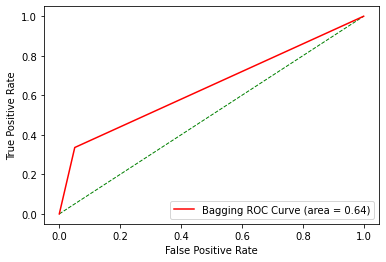

In [20]:
# Plotting the ROC curve
plt.plot([0,1], [0,1], color = "green", lw = 1, linestyle = "--")
plt.plot(bag_fpr, bag_tpr, color = "red", label = "Bagging ROC Curve (area = %0.2f)" %bag_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.show()